# Importing Libraries

In [400]:
import pandas as pd
import numpy as np

In [268]:
#Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [269]:
#sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

In [270]:
#sklearn KNN classification
import sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

# Processing Data

In [271]:
df = pd.read_csv(r'C:\Users\yesmi\OneDrive\Desktop\Junior Spring Semester\Data Mining\Tutorial\Breast Cancer KNN Classification and Regression\Breast Cancer Wisconsin (Diagnostic).csv')

In [272]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Dataset Description

This dataset contains 570 medical recods, each case is assiged an ID. 
Data is on:
1. The dignosis: (M = malignant, B = benign)

*The means, standard errors, and worst cases of:*

2. radius
3. texture
4. perimeter
5. area
6. smoothness
7. compactness
8. concavity
9. concave points
10. symmetry
11. fractal_dimension

In [273]:
df.shape

(569, 32)

In [274]:
df.info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [275]:
df.nunique()

id                         569
diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
dtype: i

In [276]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

## Cleaning Data

In [277]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [278]:
df.isnull().values.any()

False

There are no missing values.

In [279]:
#checking for duplicates

df.id.value_counts()

842302     1
90250      1
901315     1
9013579    1
9013594    1
          ..
873885     1
873843     1
873701     1
873593     1
92751      1
Name: id, Length: 569, dtype: int64

There are no duplicate values.

# KNN Classification

In [399]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [281]:
ctypes ={'M' : 1, 'B' : 0}

df['diagnosis'] = df['diagnosis'].map(ctypes) 

In [282]:
# Splitting the dataset into training and testing sets
x = df.iloc[:,2:]
y = df.iloc[:, 1]
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0, test_size = 0.2)

In [283]:
# Scaling the data (min-max)
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [284]:
#optimal number of nearest neighbours
import math
math.sqrt(len(y_test))

10.677078252031311

In [285]:
KNN = KNeighborsClassifier(n_neighbors = 10, p = 2, metric = 'euclidean')
KNN.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=10)

In [286]:
y_pred = KNN.predict(x_test)
y_pred

C:\Users\yesmi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0], dtype=int64)

In [287]:
#confusion matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[66  1]
 [ 5 42]]


In [288]:
#accuracy score
print(accuracy_score(y_test,y_pred))

0.9473684210526315


In [289]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96        67
           1       0.98      0.89      0.93        47

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



## Hyperparameter Tuning Using GridSearchCV

In [290]:
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 31))
grid_params = { 'n_neighbors' : k_range,
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 3)
# fit the model on our train set
g_res = gs.fit(x_train,y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV 1/5] END metric=minkowski, n_neighbors=1, weights=uniform;, score=0.934 total time=   0.0s
[CV 2/5] END metric=minkowski, n_neighbors=1, weights=uniform;, score=0.956 total time=   0.0s
[CV 3/5] END metric=minkowski, n_neighbors=1, weights=uniform;, score=0.923 total time=   0.0s
[CV 4/5] END metric=minkowski, n_neighbors=1, weights=uniform;, score=0.956 total time=   0.0s
[CV 5/5] END metric=minkowski, n_neighbors=1, weights=uniform;, score=0.945 total time=   0.0s
[CV 1/5] END metric=minkowski, n_neighbors=1, weights=distance;, score=0.934 total time=   0.0s
[CV 2/5] END metric=minkowski, n_neighbors=1, weights=distance;, score=0.956 total time=   0.0s
[CV 3/5] END metric=minkowski, n_neighbors=1, weights=distance;, score=0.923 total time=   0.0s
[CV 4/5] END metric=minkowski, n_neighbors=1, weights=distance;, score=0.956 total time=   0.0s
[CV 5/5] END metric=minkowski, n_neighbors=1, weights=distance;, score=0.945 t

C:\Users\yesmi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\yesmi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

[CV 4/5] END metric=minkowski, n_neighbors=5, weights=uniform;, score=0.978 total time=   0.0s
[CV 5/5] END metric=minkowski, n_neighbors=5, weights=uniform;, score=0.967 total time=   0.0s
[CV 1/5] END metric=minkowski, n_neighbors=5, weights=distance;, score=0.945 total time=   0.0s
[CV 2/5] END metric=minkowski, n_neighbors=5, weights=distance;, score=0.978 total time=   0.0s
[CV 3/5] END metric=minkowski, n_neighbors=5, weights=distance;, score=0.956 total time=   0.0s
[CV 4/5] END metric=minkowski, n_neighbors=5, weights=distance;, score=0.978 total time=   0.0s
[CV 5/5] END metric=minkowski, n_neighbors=5, weights=distance;, score=0.967 total time=   0.0s
[CV 1/5] END metric=minkowski, n_neighbors=6, weights=uniform;, score=0.923 total time=   0.0s
[CV 2/5] END metric=minkowski, n_neighbors=6, weights=uniform;, score=0.978 total time=   0.0s
[CV 3/5] END metric=minkowski, n_neighbors=6, weights=uniform;, score=0.945 total time=   0.0s
[CV 4/5] END metric=minkowski, n_neighbors=6,

C:\Users\yesmi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\yesmi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

[CV 5/5] END metric=minkowski, n_neighbors=9, weights=uniform;, score=0.978 total time=   0.0s
[CV 1/5] END metric=minkowski, n_neighbors=9, weights=distance;, score=0.934 total time=   0.0s
[CV 2/5] END metric=minkowski, n_neighbors=9, weights=distance;, score=0.978 total time=   0.0s
[CV 3/5] END metric=minkowski, n_neighbors=9, weights=distance;, score=0.956 total time=   0.0s
[CV 4/5] END metric=minkowski, n_neighbors=9, weights=distance;, score=0.989 total time=   0.0s
[CV 5/5] END metric=minkowski, n_neighbors=9, weights=distance;, score=0.978 total time=   0.0s
[CV 1/5] END metric=minkowski, n_neighbors=10, weights=uniform;, score=0.934 total time=   0.0s
[CV 2/5] END metric=minkowski, n_neighbors=10, weights=uniform;, score=0.956 total time=   0.0s
[CV 3/5] END metric=minkowski, n_neighbors=10, weights=uniform;, score=0.956 total time=   0.0s
[CV 4/5] END metric=minkowski, n_neighbors=10, weights=uniform;, score=0.978 total time=   0.0s
[CV 5/5] END metric=minkowski, n_neighbor

C:\Users\yesmi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\yesmi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\yesmi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\yesmi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

[CV 5/5] END metric=minkowski, n_neighbors=13, weights=uniform;, score=0.978 total time=   0.0s
[CV 1/5] END metric=minkowski, n_neighbors=13, weights=distance;, score=0.934 total time=   0.0s
[CV 2/5] END metric=minkowski, n_neighbors=13, weights=distance;, score=0.967 total time=   0.0s
[CV 3/5] END metric=minkowski, n_neighbors=13, weights=distance;, score=0.945 total time=   0.0s
[CV 4/5] END metric=minkowski, n_neighbors=13, weights=distance;, score=0.978 total time=   0.0s
[CV 5/5] END metric=minkowski, n_neighbors=13, weights=distance;, score=0.978 total time=   0.0s
[CV 1/5] END metric=minkowski, n_neighbors=14, weights=uniform;, score=0.923 total time=   0.0s
[CV 2/5] END metric=minkowski, n_neighbors=14, weights=uniform;, score=0.956 total time=   0.0s
[CV 3/5] END metric=minkowski, n_neighbors=14, weights=uniform;, score=0.945 total time=   0.0s
[CV 4/5] END metric=minkowski, n_neighbors=14, weights=uniform;, score=0.967 total time=   0.0s
[CV 5/5] END metric=minkowski, n_ne

C:\Users\yesmi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\yesmi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

[CV 2/5] END metric=minkowski, n_neighbors=23, weights=uniform;, score=0.967 total time=   0.0s
[CV 3/5] END metric=minkowski, n_neighbors=23, weights=uniform;, score=0.923 total time=   0.0s
[CV 4/5] END metric=minkowski, n_neighbors=23, weights=uniform;, score=0.967 total time=   0.0s
[CV 5/5] END metric=minkowski, n_neighbors=23, weights=uniform;, score=0.978 total time=   0.0s
[CV 1/5] END metric=minkowski, n_neighbors=23, weights=distance;, score=0.901 total time=   0.0s
[CV 2/5] END metric=minkowski, n_neighbors=23, weights=distance;, score=0.967 total time=   0.0s
[CV 3/5] END metric=minkowski, n_neighbors=23, weights=distance;, score=0.934 total time=   0.0s
[CV 4/5] END metric=minkowski, n_neighbors=23, weights=distance;, score=0.967 total time=   0.0s
[CV 5/5] END metric=minkowski, n_neighbors=23, weights=distance;, score=0.978 total time=   0.0s
[CV 1/5] END metric=minkowski, n_neighbors=24, weights=uniform;, score=0.912 total time=   0.0s
[CV 2/5] END metric=minkowski, n_ne

C:\Users\yesmi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\yesmi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

[CV 3/5] END metric=minkowski, n_neighbors=28, weights=uniform;, score=0.923 total time=   0.0s
[CV 4/5] END metric=minkowski, n_neighbors=28, weights=uniform;, score=0.967 total time=   0.0s
[CV 5/5] END metric=minkowski, n_neighbors=28, weights=uniform;, score=0.978 total time=   0.0s
[CV 1/5] END metric=minkowski, n_neighbors=28, weights=distance;, score=0.912 total time=   0.0s
[CV 2/5] END metric=minkowski, n_neighbors=28, weights=distance;, score=0.967 total time=   0.0s
[CV 3/5] END metric=minkowski, n_neighbors=28, weights=distance;, score=0.923 total time=   0.0s
[CV 4/5] END metric=minkowski, n_neighbors=28, weights=distance;, score=0.967 total time=   0.0s
[CV 5/5] END metric=minkowski, n_neighbors=28, weights=distance;, score=0.978 total time=   0.0s
[CV 1/5] END metric=minkowski, n_neighbors=29, weights=uniform;, score=0.912 total time=   0.0s
[CV 2/5] END metric=minkowski, n_neighbors=29, weights=uniform;, score=0.967 total time=   0.0s
[CV 3/5] END metric=minkowski, n_ne

C:\Users\yesmi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\yesmi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

[CV 3/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.945 total time=   0.0s
[CV 4/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=1.000 total time=   0.0s
[CV 5/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.956 total time=   0.0s
[CV 1/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.934 total time=   0.0s
[CV 2/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.978 total time=   0.0s
[CV 3/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.945 total time=   0.0s
[CV 4/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=1.000 total time=   0.0s
[CV 5/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.956 total time=   0.0s
[CV 1/5] END metric=euclidean, n_neighbors=4, weights=uniform;, score=0.945 total time=   0.0s
[CV 2/5] END metric=euclidean, n_neighbors=4, weights=uniform;, score=0.978 total time=   0.0s
[CV 3/5] END metric=euclidean, n_neighbors=4,

C:\Users\yesmi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\yesmi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\yesmi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\yesmi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

[CV 2/5] END metric=euclidean, n_neighbors=7, weights=uniform;, score=0.978 total time=   0.0s
[CV 3/5] END metric=euclidean, n_neighbors=7, weights=uniform;, score=0.956 total time=   0.0s
[CV 4/5] END metric=euclidean, n_neighbors=7, weights=uniform;, score=0.978 total time=   0.0s
[CV 5/5] END metric=euclidean, n_neighbors=7, weights=uniform;, score=0.967 total time=   0.0s
[CV 1/5] END metric=euclidean, n_neighbors=7, weights=distance;, score=0.923 total time=   0.0s
[CV 2/5] END metric=euclidean, n_neighbors=7, weights=distance;, score=0.978 total time=   0.0s
[CV 3/5] END metric=euclidean, n_neighbors=7, weights=distance;, score=0.956 total time=   0.0s
[CV 4/5] END metric=euclidean, n_neighbors=7, weights=distance;, score=0.978 total time=   0.0s
[CV 5/5] END metric=euclidean, n_neighbors=7, weights=distance;, score=0.967 total time=   0.0s
[CV 1/5] END metric=euclidean, n_neighbors=8, weights=uniform;, score=0.934 total time=   0.0s
[CV 2/5] END metric=euclidean, n_neighbors=8,

C:\Users\yesmi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\yesmi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

[CV 5/5] END metric=euclidean, n_neighbors=14, weights=uniform;, score=0.967 total time=   0.0s
[CV 1/5] END metric=euclidean, n_neighbors=14, weights=distance;, score=0.934 total time=   0.0s
[CV 2/5] END metric=euclidean, n_neighbors=14, weights=distance;, score=0.967 total time=   0.0s
[CV 3/5] END metric=euclidean, n_neighbors=14, weights=distance;, score=0.934 total time=   0.0s
[CV 4/5] END metric=euclidean, n_neighbors=14, weights=distance;, score=0.978 total time=   0.0s
[CV 5/5] END metric=euclidean, n_neighbors=14, weights=distance;, score=0.989 total time=   0.0s
[CV 1/5] END metric=euclidean, n_neighbors=15, weights=uniform;, score=0.923 total time=   0.0s
[CV 2/5] END metric=euclidean, n_neighbors=15, weights=uniform;, score=0.967 total time=   0.0s
[CV 3/5] END metric=euclidean, n_neighbors=15, weights=uniform;, score=0.945 total time=   0.0s
[CV 4/5] END metric=euclidean, n_neighbors=15, weights=uniform;, score=0.967 total time=   0.0s
[CV 5/5] END metric=euclidean, n_ne

C:\Users\yesmi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\yesmi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

[CV 4/5] END metric=euclidean, n_neighbors=20, weights=uniform;, score=0.967 total time=   0.0s
[CV 5/5] END metric=euclidean, n_neighbors=20, weights=uniform;, score=0.978 total time=   0.0s
[CV 1/5] END metric=euclidean, n_neighbors=20, weights=distance;, score=0.923 total time=   0.0s
[CV 2/5] END metric=euclidean, n_neighbors=20, weights=distance;, score=0.967 total time=   0.0s
[CV 3/5] END metric=euclidean, n_neighbors=20, weights=distance;, score=0.934 total time=   0.0s
[CV 4/5] END metric=euclidean, n_neighbors=20, weights=distance;, score=0.967 total time=   0.0s
[CV 5/5] END metric=euclidean, n_neighbors=20, weights=distance;, score=0.989 total time=   0.0s
[CV 1/5] END metric=euclidean, n_neighbors=21, weights=uniform;, score=0.912 total time=   0.0s
[CV 2/5] END metric=euclidean, n_neighbors=21, weights=uniform;, score=0.967 total time=   0.0s
[CV 3/5] END metric=euclidean, n_neighbors=21, weights=uniform;, score=0.923 total time=   0.0s
[CV 4/5] END metric=euclidean, n_ne

C:\Users\yesmi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\yesmi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\yesmi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\yesmi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

[CV 1/5] END metric=euclidean, n_neighbors=24, weights=uniform;, score=0.912 total time=   0.0s
[CV 2/5] END metric=euclidean, n_neighbors=24, weights=uniform;, score=0.967 total time=   0.0s
[CV 3/5] END metric=euclidean, n_neighbors=24, weights=uniform;, score=0.923 total time=   0.0s
[CV 4/5] END metric=euclidean, n_neighbors=24, weights=uniform;, score=0.967 total time=   0.0s
[CV 5/5] END metric=euclidean, n_neighbors=24, weights=uniform;, score=0.978 total time=   0.0s
[CV 1/5] END metric=euclidean, n_neighbors=24, weights=distance;, score=0.901 total time=   0.0s
[CV 2/5] END metric=euclidean, n_neighbors=24, weights=distance;, score=0.967 total time=   0.0s
[CV 3/5] END metric=euclidean, n_neighbors=24, weights=distance;, score=0.934 total time=   0.0s
[CV 4/5] END metric=euclidean, n_neighbors=24, weights=distance;, score=0.967 total time=   0.0s
[CV 5/5] END metric=euclidean, n_neighbors=24, weights=distance;, score=0.978 total time=   0.0s
[CV 1/5] END metric=euclidean, n_ne

C:\Users\yesmi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\yesmi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

[CV 1/5] END metric=manhattan, n_neighbors=1, weights=distance;, score=0.934 total time=   0.0s
[CV 2/5] END metric=manhattan, n_neighbors=1, weights=distance;, score=0.967 total time=   0.0s
[CV 3/5] END metric=manhattan, n_neighbors=1, weights=distance;, score=0.923 total time=   0.0s
[CV 4/5] END metric=manhattan, n_neighbors=1, weights=distance;, score=0.945 total time=   0.0s
[CV 5/5] END metric=manhattan, n_neighbors=1, weights=distance;, score=0.956 total time=   0.0s
[CV 1/5] END metric=manhattan, n_neighbors=2, weights=uniform;, score=0.956 total time=   0.0s
[CV 2/5] END metric=manhattan, n_neighbors=2, weights=uniform;, score=0.978 total time=   0.0s
[CV 3/5] END metric=manhattan, n_neighbors=2, weights=uniform;, score=0.923 total time=   0.0s
[CV 4/5] END metric=manhattan, n_neighbors=2, weights=uniform;, score=0.967 total time=   0.0s
[CV 5/5] END metric=manhattan, n_neighbors=2, weights=uniform;, score=0.956 total time=   0.0s
[CV 1/5] END metric=manhattan, n_neighbors=2,

C:\Users\yesmi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\yesmi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

[CV 5/5] END metric=manhattan, n_neighbors=5, weights=uniform;, score=0.978 total time=   0.0s
[CV 1/5] END metric=manhattan, n_neighbors=5, weights=distance;, score=0.956 total time=   0.0s
[CV 2/5] END metric=manhattan, n_neighbors=5, weights=distance;, score=0.978 total time=   0.0s
[CV 3/5] END metric=manhattan, n_neighbors=5, weights=distance;, score=0.934 total time=   0.0s
[CV 4/5] END metric=manhattan, n_neighbors=5, weights=distance;, score=0.989 total time=   0.0s
[CV 5/5] END metric=manhattan, n_neighbors=5, weights=distance;, score=0.978 total time=   0.0s
[CV 1/5] END metric=manhattan, n_neighbors=6, weights=uniform;, score=0.956 total time=   0.0s
[CV 2/5] END metric=manhattan, n_neighbors=6, weights=uniform;, score=0.978 total time=   0.0s
[CV 3/5] END metric=manhattan, n_neighbors=6, weights=uniform;, score=0.945 total time=   0.0s
[CV 4/5] END metric=manhattan, n_neighbors=6, weights=uniform;, score=0.978 total time=   0.0s
[CV 5/5] END metric=manhattan, n_neighbors=6,

C:\Users\yesmi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\yesmi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

[CV 4/5] END metric=manhattan, n_neighbors=10, weights=distance;, score=0.978 total time=   0.0s
[CV 5/5] END metric=manhattan, n_neighbors=10, weights=distance;, score=0.978 total time=   0.0s
[CV 1/5] END metric=manhattan, n_neighbors=11, weights=uniform;, score=0.934 total time=   0.0s
[CV 2/5] END metric=manhattan, n_neighbors=11, weights=uniform;, score=0.978 total time=   0.0s
[CV 3/5] END metric=manhattan, n_neighbors=11, weights=uniform;, score=0.956 total time=   0.0s
[CV 4/5] END metric=manhattan, n_neighbors=11, weights=uniform;, score=0.978 total time=   0.0s
[CV 5/5] END metric=manhattan, n_neighbors=11, weights=uniform;, score=1.000 total time=   0.0s
[CV 1/5] END metric=manhattan, n_neighbors=11, weights=distance;, score=0.934 total time=   0.0s
[CV 2/5] END metric=manhattan, n_neighbors=11, weights=distance;, score=0.978 total time=   0.0s
[CV 3/5] END metric=manhattan, n_neighbors=11, weights=distance;, score=0.956 total time=   0.0s
[CV 4/5] END metric=manhattan, n_ne

C:\Users\yesmi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\yesmi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

[CV 2/5] END metric=manhattan, n_neighbors=15, weights=distance;, score=0.978 total time=   0.0s
[CV 3/5] END metric=manhattan, n_neighbors=15, weights=distance;, score=0.945 total time=   0.0s
[CV 4/5] END metric=manhattan, n_neighbors=15, weights=distance;, score=0.978 total time=   0.0s
[CV 5/5] END metric=manhattan, n_neighbors=15, weights=distance;, score=0.989 total time=   0.0s
[CV 1/5] END metric=manhattan, n_neighbors=16, weights=uniform;, score=0.923 total time=   0.0s
[CV 2/5] END metric=manhattan, n_neighbors=16, weights=uniform;, score=0.967 total time=   0.0s
[CV 3/5] END metric=manhattan, n_neighbors=16, weights=uniform;, score=0.923 total time=   0.0s
[CV 4/5] END metric=manhattan, n_neighbors=16, weights=uniform;, score=0.967 total time=   0.0s
[CV 5/5] END metric=manhattan, n_neighbors=16, weights=uniform;, score=0.989 total time=   0.0s
[CV 1/5] END metric=manhattan, n_neighbors=16, weights=distance;, score=0.923 total time=   0.0s
[CV 2/5] END metric=manhattan, n_ne

C:\Users\yesmi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\yesmi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

[CV 3/5] END metric=manhattan, n_neighbors=21, weights=uniform;, score=0.934 total time=   0.0s
[CV 4/5] END metric=manhattan, n_neighbors=21, weights=uniform;, score=0.967 total time=   0.0s
[CV 5/5] END metric=manhattan, n_neighbors=21, weights=uniform;, score=0.989 total time=   0.0s
[CV 1/5] END metric=manhattan, n_neighbors=21, weights=distance;, score=0.912 total time=   0.0s
[CV 2/5] END metric=manhattan, n_neighbors=21, weights=distance;, score=0.978 total time=   0.0s
[CV 3/5] END metric=manhattan, n_neighbors=21, weights=distance;, score=0.934 total time=   0.0s
[CV 4/5] END metric=manhattan, n_neighbors=21, weights=distance;, score=0.967 total time=   0.0s
[CV 5/5] END metric=manhattan, n_neighbors=21, weights=distance;, score=0.989 total time=   0.0s
[CV 1/5] END metric=manhattan, n_neighbors=22, weights=uniform;, score=0.923 total time=   0.0s
[CV 2/5] END metric=manhattan, n_neighbors=22, weights=uniform;, score=0.967 total time=   0.0s
[CV 3/5] END metric=manhattan, n_ne

C:\Users\yesmi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\yesmi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

[CV 4/5] END metric=manhattan, n_neighbors=26, weights=uniform;, score=0.956 total time=   0.0s
[CV 5/5] END metric=manhattan, n_neighbors=26, weights=uniform;, score=0.978 total time=   0.0s
[CV 1/5] END metric=manhattan, n_neighbors=26, weights=distance;, score=0.923 total time=   0.0s
[CV 2/5] END metric=manhattan, n_neighbors=26, weights=distance;, score=0.956 total time=   0.0s
[CV 3/5] END metric=manhattan, n_neighbors=26, weights=distance;, score=0.923 total time=   0.0s
[CV 4/5] END metric=manhattan, n_neighbors=26, weights=distance;, score=0.967 total time=   0.0s
[CV 5/5] END metric=manhattan, n_neighbors=26, weights=distance;, score=0.978 total time=   0.0s
[CV 1/5] END metric=manhattan, n_neighbors=27, weights=uniform;, score=0.923 total time=   0.0s
[CV 2/5] END metric=manhattan, n_neighbors=27, weights=uniform;, score=0.956 total time=   0.0s
[CV 3/5] END metric=manhattan, n_neighbors=27, weights=uniform;, score=0.923 total time=   0.0s
[CV 4/5] END metric=manhattan, n_ne

C:\Users\yesmi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\yesmi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [291]:
# find the best score
print("Best Score: ",g_res.best_score_)

Best Score:  0.9692307692307693


In [292]:
# get the hyperparameters with the best score
print("Best Hyperparameters", g_res.best_params_)

Best Hyperparameters {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'uniform'}


In [293]:
KNN = KNeighborsClassifier(n_neighbors = 11, metric = 'manhattan',weights = 'uniform' )
KNN.fit(x_train,y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=11)

In [294]:
y_pred = KNN.predict(x_test)
y_pred

C:\Users\yesmi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0], dtype=int64)

In [295]:
print(accuracy_score(y_test,y_pred))

0.9473684210526315


In [296]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[65  2]
 [ 4 43]]


C:\Users\yesmi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Text(0.5, 23.52222222222222, 'Predicted Labels')

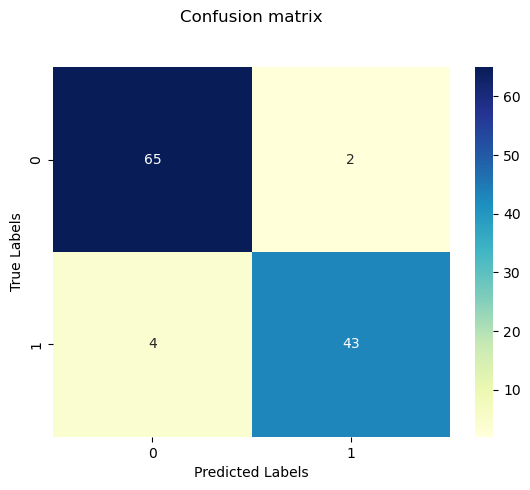

In [297]:
y_pred = KNN.predict(x_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

## Interpretation

The best Hyperparameters for KNN classification in this case are:manhattan as a distance, n_neighbors= 11,and uniform weights.

In the context of the breast cancer dataset, accuracy represents the percentage of correctly classified samples (i.e., how often the model correctly predicts whether a tumor is malignant or benign)

With a **0.947% accuracy score**, the model classifies 65 Malignant cancer cases correctly, and only 2 incorrectly (2 Patients have Benign breast cancer but have dignosed with Malignant cancer). And 4 patients with Malignant cancer have been dignosed with Benign breast cancer.

# KNN Regression

In [300]:
#libraries 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

In [301]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [302]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 12)
x_train.shape, x_test.shape

((455, 30), (114, 30))

In [338]:
# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []
rmse_train = []
rmse_test = []

In [353]:
def storeResults(model, a,b,c,d):
    ML_Model.append(model)
    acc_train.append(round(a, 3))
    acc_test.append(round(b, 3))
    rmse_train.append(round(c, 3))
    rmse_test.append(round(d, 3))

In [354]:
knn = KNeighborsRegressor()

In [384]:
k_range = list(range(1, 31))
weight_options = ['uniform', 'distance']
metric_options = ['minkowski', 'euclidean', 'manhattan']
param_grid = {'n_neighbors': k_range,
              'weights': weight_options,
              'metric': metric_options}

In [385]:
# instantiate the grid
knn_grid = GridSearchCV(knn, param_grid, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)


In [386]:
knn_grid.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error')

In [388]:
#Checking the best parameters for the model
knn_para = knn_grid.best_params_
print(knn_para)

{'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}


In [393]:
knn_best.fit(x_train, y_train)
y_train_knn = knn_best.predict(x_train)
y_test_knn = knn_best.predict(x_test)

In [390]:
acc_train_knn = knn_grid.score(x_train, y_train) 
acc_test_knn = knn_grid.score(x_test, y_test)

In [394]:
acc_train_knn = knn_best.score(x_train, y_train)
acc_test_knn = knn_best.score(x_test, y_test)

In [395]:
rmse_train_knn = np.sqrt(mean_squared_error(y_train, y_train_knn))
rmse_test_knn = np.sqrt(mean_squared_error(y_test, y_test_knn))

In [396]:
storeResults('KNN', acc_train_knn, acc_test_knn, rmse_train_knn, rmse_test_knn)

In [397]:
print("KNN: Accuracy on training Data: {:.3f}".format(acc_train_knn))
print("KNN: Accuracy on test Data: {:.3f}".format(acc_test_knn))

KNN: Accuracy on training Data: 1.000
KNN: Accuracy on test Data: 0.715


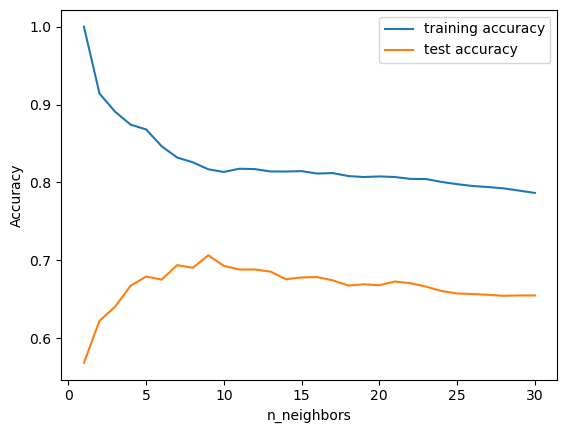

In [364]:
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 20
neighbors_settings = range(1, 31)
for n in neighbors_settings:
    # fit the model
    knn = KNeighborsRegressor(n_neighbors=n)
    knn.fit(x_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(x_train, y_train))
    # record generalization accuracy
    test_accuracy.append(knn.score(x_test, y_test))

#plotting the training & testing accuracy for n_neighbours from 1 to 30
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_neighbors")
plt.legend()

In [365]:
print("MSE:",mean_squared_error(y_test, y_test_knn))

MSE: 0.07130882171721656


## Regression Interpretation
* The best hyperparameters found by the grid search are printed using the best_params_ attribute of the grid search object.
* The KNN model is fitted on the training data

KNN regression is not suitable for this dataset because it is a binary classification, and the accuracy is low compared to KNN classification. 